In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import cv2
import numpy
import os
from scipy.interpolate import RectBivariateSpline
#最小値0、最大値1にする数量正規化メソッド
def normalization(x):
    x_min = x.min()
    x_max = x.max()
    x_norm = (x - x_min) / (x_max - x_min)
    return x_norm   #正規化した配列を返す

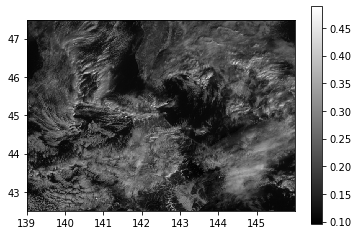

In [120]:
plt.imshow(val_out,extent=(lon[0],lon[-1],lat[-1],lat[0]),interpolation='none',cmap="gray")
plt.colorbar();


In [2]:
fnam = '202001130100/HS_H08_20200113_0100_B01_JP01_R10_S0101.DAT'

fsiz = os.path.getsize(fnam)
with open(fnam,'rb') as fp:
 head = fp.read(fsiz)
 data = np.frombuffer(fp.read(),dtype='u2')

imax, = np.frombuffer(head[3:5],dtype='u2')
j,h = 0,[]
for i in range(imax):
 n, = np.frombuffer(head[j+1:j+3],dtype='u2')
 h.append(head[j:j+n])
 j += n

colum, = np.frombuffer(h[1][5:7],dtype='u2')
line, = np.frombuffer(h[1][7:9],dtype='u2')



NCOL = int(colum)
NLIN = int(line)
hsiz = os.path.getsize(fnam)- NLIN*NCOL*2
with open(fnam,'rb') as fp:
 head = fp.read(hsiz)
 data = np.frombuffer(fp.read(),dtype='u2').reshape(NLIN,NCOL)
    
validbit, = np.frombuffer(h[4][13:15],dtype='u2')
sub_lon, = np.frombuffer(h[2][3:11])
cfac,lfac = np.frombuffer(h[2][11:19],dtype='u4')
coff,loff = np.frombuffer(h[2][19:27],dtype='f4')
p1,p2,p3,p4,p5,p6,p7 = np.frombuffer(h[2][27:83])
band, = np.frombuffer(h[4][3:5],dtype='u2')
wlen, = np.frombuffer(h[4][5:13])
verr,vout = np.frombuffer(h[4][15:19],dtype='u2')
gain,cnst = np.frombuffer(h[4][19:35])
lnum, = np.frombuffer(h[6][5:7],dtype='u2')

LMIN = 1.0e-60
lrad = gain*data+cnst
lrad[lrad < LMIN] = LMIN
if band > 6:
 wlen *= 1.0e-6
 lrad *= 1.0e6
 c0,c1,c2,c_0,c_1,c_2,c_c,c_h,c_k = np.frombuffer(h[4][35:107])
 t_e = c_h*c_c/(c_k*wlen*np.log(2*c_h*c_c**2/(wlen**5*lrad)+1))
 val = c0+c1*t_e+c2*t_e**2
else:
 coef, = np.frombuffer(h[4][35:43])
 val = coef*lrad
    
lon = np.arange(139.0,146.0,0.01)
lat = np.arange(47.5,42.5,-0.01)
col = np.arange(NCOL)+1
lin = np.arange(NLIN)+lnum
rad_lat = np.radians(lat)
c_lat = np.arctan(p5*np.tan(rad_lat))
c_lon = np.radians(lon-sub_lon)
cos_lat = np.cos(c_lat).reshape(-1,1)
sin_lat = np.sin(c_lat).reshape(-1,1)
cos_lon = np.cos(c_lon).reshape(1,-1)
sin_lon = np.sin(c_lon).reshape(1,-1)
rl = p3/np.sqrt(1.0-p4*cos_lat**2)
r1 = p1-rl*cos_lat*cos_lon
r2 = -rl*cos_lat*sin_lon
r3 = rl*sin_lat
rn = np.sqrt(r1*r1+r2*r2+r3*r3)
x = np.degrees(np.arctan(-r2/r1))
y = np.degrees(np.arcsin(-r3/rn))
col_out = coff+x/65536*cfac
lin_out = loff+y/65536*lfac
b01k = RectBivariateSpline(lin,col,val).ev(lin_out,col_out)
b01 = RectBivariateSpline(lin,col,data).ev(lin_out,col_out)


In [18]:
fnam = '202001130100/HS_H08_20200113_0100_B02_JP01_R10_S0101.DAT'

fsiz = os.path.getsize(fnam)
with open(fnam,'rb') as fp:
 head = fp.read(fsiz)
 data = np.frombuffer(fp.read(),dtype='u2')

imax, = np.frombuffer(head[3:5],dtype='u2')
j,h = 0,[]
for i in range(imax):
 n, = np.frombuffer(head[j+1:j+3],dtype='u2')
 h.append(head[j:j+n])
 j += n

colum, = np.frombuffer(h[1][5:7],dtype='u2')
line, = np.frombuffer(h[1][7:9],dtype='u2')



NCOL = int(colum)
NLIN = int(line)
hsiz = os.path.getsize(fnam)- NLIN*NCOL*2
with open(fnam,'rb') as fp:
 head = fp.read(hsiz)
 data = np.frombuffer(fp.read(),dtype='u2').reshape(NLIN,NCOL)
    
validbit, = np.frombuffer(h[4][13:15],dtype='u2')
sub_lon, = np.frombuffer(h[2][3:11])
cfac,lfac = np.frombuffer(h[2][11:19],dtype='u4')
coff,loff = np.frombuffer(h[2][19:27],dtype='f4')
p1,p2,p3,p4,p5,p6,p7 = np.frombuffer(h[2][27:83])
band, = np.frombuffer(h[4][3:5],dtype='u2')
wlen, = np.frombuffer(h[4][5:13])
verr,vout = np.frombuffer(h[4][15:19],dtype='u2')
gain,cnst = np.frombuffer(h[4][19:35])
lnum, = np.frombuffer(h[6][5:7],dtype='u2')

LMIN = 1.0e-60
lrad = gain*data+cnst
lrad[lrad < LMIN] = LMIN
if band > 6:
 wlen *= 1.0e-6
 lrad *= 1.0e6
 c0,c1,c2,c_0,c_1,c_2,c_c,c_h,c_k = np.frombuffer(h[4][35:107])
 t_e = c_h*c_c/(c_k*wlen*np.log(2*c_h*c_c**2/(wlen**5*lrad)+1))
 val = c0+c1*t_e+c2*t_e**2
else:
 coef, = np.frombuffer(h[4][35:43])
 val = coef*lrad
    
    
lon = np.arange(139.0,146.0,0.01)
lat = np.arange(47.5,42.5,-0.01)
col = np.arange(NCOL)+1
lin = np.arange(NLIN)+lnum
rad_lat = np.radians(lat)
c_lat = np.arctan(p5*np.tan(rad_lat))
c_lon = np.radians(lon-sub_lon)
cos_lat = np.cos(c_lat).reshape(-1,1)
sin_lat = np.sin(c_lat).reshape(-1,1)
cos_lon = np.cos(c_lon).reshape(1,-1)
sin_lon = np.sin(c_lon).reshape(1,-1)
rl = p3/np.sqrt(1.0-p4*cos_lat**2)
r1 = p1-rl*cos_lat*cos_lon
r2 = -rl*cos_lat*sin_lon
r3 = rl*sin_lat
rn = np.sqrt(r1*r1+r2*r2+r3*r3)
x = np.degrees(np.arctan(-r2/r1))
y = np.degrees(np.arcsin(-r3/rn))
col_out = coff+x/65536*cfac
lin_out = loff+y/65536*lfac
b02k = RectBivariateSpline(lin,col,val).ev(lin_out,col_out)
b02 = RectBivariateSpline(lin,col,data).ev(lin_out,col_out)

In [4]:
fnam = '202001130100/HS_H08_20200113_0100_B03_JP01_R05_S0101.DAT'

fsiz = os.path.getsize(fnam)
with open(fnam,'rb') as fp:
 head = fp.read(fsiz)
 data = np.frombuffer(fp.read(),dtype='u2')

imax, = np.frombuffer(head[3:5],dtype='u2')
j,h = 0,[]
for i in range(imax):
 n, = np.frombuffer(head[j+1:j+3],dtype='u2')
 h.append(head[j:j+n])
 j += n

colum, = np.frombuffer(h[1][5:7],dtype='u2')
line, = np.frombuffer(h[1][7:9],dtype='u2')



NCOL = int(colum)
NLIN = int(line)
hsiz = os.path.getsize(fnam)- NLIN*NCOL*2
with open(fnam,'rb') as fp:
 head = fp.read(hsiz)
 data = np.frombuffer(fp.read(),dtype='u2').reshape(NLIN,NCOL)
    
validbit, = np.frombuffer(h[4][13:15],dtype='u2')
sub_lon, = np.frombuffer(h[2][3:11])
cfac,lfac = np.frombuffer(h[2][11:19],dtype='u4')
coff,loff = np.frombuffer(h[2][19:27],dtype='f4')
p1,p2,p3,p4,p5,p6,p7 = np.frombuffer(h[2][27:83])
band, = np.frombuffer(h[4][3:5],dtype='u2')
wlen, = np.frombuffer(h[4][5:13])
verr,vout = np.frombuffer(h[4][15:19],dtype='u2')
gain,cnst = np.frombuffer(h[4][19:35])
lnum, = np.frombuffer(h[6][5:7],dtype='u2')

LMIN = 1.0e-60
lrad = gain*data+cnst
lrad[lrad < LMIN] = LMIN
if band > 6:
 wlen *= 1.0e-6
 lrad *= 1.0e6
 c0,c1,c2,c_0,c_1,c_2,c_c,c_h,c_k = np.frombuffer(h[4][35:107])
 t_e = c_h*c_c/(c_k*wlen*np.log(2*c_h*c_c**2/(wlen**5*lrad)+1))
 val = c0+c1*t_e+c2*t_e**2
else:
 coef, = np.frombuffer(h[4][35:43])
 val = coef*lrad
    
lon = np.arange(139.0,146.0,0.01)
lat = np.arange(47.5,42.5,-0.01)
col = np.arange(NCOL)+1
lin = np.arange(NLIN)+lnum
rad_lat = np.radians(lat)
c_lat = np.arctan(p5*np.tan(rad_lat))
c_lon = np.radians(lon-sub_lon)
cos_lat = np.cos(c_lat).reshape(-1,1)
sin_lat = np.sin(c_lat).reshape(-1,1)
cos_lon = np.cos(c_lon).reshape(1,-1)
sin_lon = np.sin(c_lon).reshape(1,-1)
rl = p3/np.sqrt(1.0-p4*cos_lat**2)
r1 = p1-rl*cos_lat*cos_lon
r2 = -rl*cos_lat*sin_lon
r3 = rl*sin_lat
rn = np.sqrt(r1*r1+r2*r2+r3*r3)
x = np.degrees(np.arctan(-r2/r1))
y = np.degrees(np.arcsin(-r3/rn))
col_out = coff+x/65536*cfac
lin_out = loff+y/65536*lfac
b03k = RectBivariateSpline(lin,col,val).ev(lin_out,col_out)
b03 = RectBivariateSpline(lin,col,data).ev(lin_out,col_out)

In [5]:
fnam = '202001130100/HS_H08_20200113_0100_B04_JP01_R10_S0101.DAT'

fsiz = os.path.getsize(fnam)
with open(fnam,'rb') as fp:
 head = fp.read(fsiz)
 data = np.frombuffer(fp.read(),dtype='u2')

imax, = np.frombuffer(head[3:5],dtype='u2')
j,h = 0,[]
for i in range(imax):
 n, = np.frombuffer(head[j+1:j+3],dtype='u2')
 h.append(head[j:j+n])
 j += n

colum, = np.frombuffer(h[1][5:7],dtype='u2')
line, = np.frombuffer(h[1][7:9],dtype='u2')



NCOL = int(colum)
NLIN = int(line)
hsiz = os.path.getsize(fnam)- NLIN*NCOL*2
with open(fnam,'rb') as fp:
 head = fp.read(hsiz)
 data = np.frombuffer(fp.read(),dtype='u2').reshape(NLIN,NCOL)
    
validbit, = np.frombuffer(h[4][13:15],dtype='u2')
sub_lon, = np.frombuffer(h[2][3:11])
cfac,lfac = np.frombuffer(h[2][11:19],dtype='u4')
coff,loff = np.frombuffer(h[2][19:27],dtype='f4')
p1,p2,p3,p4,p5,p6,p7 = np.frombuffer(h[2][27:83])
band, = np.frombuffer(h[4][3:5],dtype='u2')
wlen, = np.frombuffer(h[4][5:13])
verr,vout = np.frombuffer(h[4][15:19],dtype='u2')
gain,cnst = np.frombuffer(h[4][19:35])
lnum, = np.frombuffer(h[6][5:7],dtype='u2')

LMIN = 1.0e-60
lrad = gain*data+cnst
lrad[lrad < LMIN] = LMIN
if band > 6:
 wlen *= 1.0e-6
 lrad *= 1.0e6
 c0,c1,c2,c_0,c_1,c_2,c_c,c_h,c_k = np.frombuffer(h[4][35:107])
 t_e = c_h*c_c/(c_k*wlen*np.log(2*c_h*c_c**2/(wlen**5*lrad)+1))
 val = c0+c1*t_e+c2*t_e**2
else:
 coef, = np.frombuffer(h[4][35:43])
 val = coef*lrad
    
lon = np.arange(139.0,146.0,0.01)
lat = np.arange(47.5,42.5,-0.01)
col = np.arange(NCOL)+1
lin = np.arange(NLIN)+lnum
rad_lat = np.radians(lat)
c_lat = np.arctan(p5*np.tan(rad_lat))
c_lon = np.radians(lon-sub_lon)
cos_lat = np.cos(c_lat).reshape(-1,1)
sin_lat = np.sin(c_lat).reshape(-1,1)
cos_lon = np.cos(c_lon).reshape(1,-1)
sin_lon = np.sin(c_lon).reshape(1,-1)
rl = p3/np.sqrt(1.0-p4*cos_lat**2)
r1 = p1-rl*cos_lat*cos_lon
r2 = -rl*cos_lat*sin_lon
r3 = rl*sin_lat
rn = np.sqrt(r1*r1+r2*r2+r3*r3)
x = np.degrees(np.arctan(-r2/r1))
y = np.degrees(np.arcsin(-r3/rn))
col_out = coff+x/65536*cfac
lin_out = loff+y/65536*lfac
b04k = RectBivariateSpline(lin,col,val).ev(lin_out,col_out)
b04 = RectBivariateSpline(lin,col,data).ev(lin_out,col_out)

In [6]:
fnam = '202001130100/HS_H08_20200113_0100_B05_JP01_R20_S0101.DAT'

fsiz = os.path.getsize(fnam)
with open(fnam,'rb') as fp:
 head = fp.read(fsiz)
 data = np.frombuffer(fp.read(),dtype='u2')

imax, = np.frombuffer(head[3:5],dtype='u2')
j,h = 0,[]
for i in range(imax):
 n, = np.frombuffer(head[j+1:j+3],dtype='u2')
 h.append(head[j:j+n])
 j += n

colum, = np.frombuffer(h[1][5:7],dtype='u2')
line, = np.frombuffer(h[1][7:9],dtype='u2')



NCOL = int(colum)
NLIN = int(line)
hsiz = os.path.getsize(fnam)- NLIN*NCOL*2
with open(fnam,'rb') as fp:
 head = fp.read(hsiz)
 data = np.frombuffer(fp.read(),dtype='u2').reshape(NLIN,NCOL)
    
validbit, = np.frombuffer(h[4][13:15],dtype='u2')
sub_lon, = np.frombuffer(h[2][3:11])
cfac,lfac = np.frombuffer(h[2][11:19],dtype='u4')
coff,loff = np.frombuffer(h[2][19:27],dtype='f4')
p1,p2,p3,p4,p5,p6,p7 = np.frombuffer(h[2][27:83])
band, = np.frombuffer(h[4][3:5],dtype='u2')
wlen, = np.frombuffer(h[4][5:13])
verr,vout = np.frombuffer(h[4][15:19],dtype='u2')
gain,cnst = np.frombuffer(h[4][19:35])
lnum, = np.frombuffer(h[6][5:7],dtype='u2')

LMIN = 1.0e-60
lrad = gain*data+cnst
lrad[lrad < LMIN] = LMIN
if band > 6:
 wlen *= 1.0e-6
 lrad *= 1.0e6
 c0,c1,c2,c_0,c_1,c_2,c_c,c_h,c_k = np.frombuffer(h[4][35:107])
 t_e = c_h*c_c/(c_k*wlen*np.log(2*c_h*c_c**2/(wlen**5*lrad)+1))
 val = c0+c1*t_e+c2*t_e**2
else:
 coef, = np.frombuffer(h[4][35:43])
 val = coef*lrad
    
lon = np.arange(139.0,146.0,0.01)
lat = np.arange(47.5,42.5,-0.01)
col = np.arange(NCOL)+1
lin = np.arange(NLIN)+lnum
rad_lat = np.radians(lat)
c_lat = np.arctan(p5*np.tan(rad_lat))
c_lon = np.radians(lon-sub_lon)
cos_lat = np.cos(c_lat).reshape(-1,1)
sin_lat = np.sin(c_lat).reshape(-1,1)
cos_lon = np.cos(c_lon).reshape(1,-1)
sin_lon = np.sin(c_lon).reshape(1,-1)
rl = p3/np.sqrt(1.0-p4*cos_lat**2)
r1 = p1-rl*cos_lat*cos_lon
r2 = -rl*cos_lat*sin_lon
r3 = rl*sin_lat
rn = np.sqrt(r1*r1+r2*r2+r3*r3)
x = np.degrees(np.arctan(-r2/r1))
y = np.degrees(np.arcsin(-r3/rn))
col_out = coff+x/65536*cfac
lin_out = loff+y/65536*lfac
b05k = RectBivariateSpline(lin,col,val).ev(lin_out,col_out)
b05 = RectBivariateSpline(lin,col,data).ev(lin_out,col_out)

In [7]:
fnam = '202001130100/HS_H08_20200113_0100_B07_JP01_R20_S0101.DAT'

fsiz = os.path.getsize(fnam)
with open(fnam,'rb') as fp:
 head = fp.read(fsiz)
 data = np.frombuffer(fp.read(),dtype='u2')

imax, = np.frombuffer(head[3:5],dtype='u2')
j,h = 0,[]
for i in range(imax):
 n, = np.frombuffer(head[j+1:j+3],dtype='u2')
 h.append(head[j:j+n])
 j += n

colum, = np.frombuffer(h[1][5:7],dtype='u2')
line, = np.frombuffer(h[1][7:9],dtype='u2')



NCOL = int(colum)
NLIN = int(line)
hsiz = os.path.getsize(fnam)- NLIN*NCOL*2
with open(fnam,'rb') as fp:
 head = fp.read(hsiz)
 data = np.frombuffer(fp.read(),dtype='u2').reshape(NLIN,NCOL)
    
validbit, = np.frombuffer(h[4][13:15],dtype='u2')
sub_lon, = np.frombuffer(h[2][3:11])
cfac,lfac = np.frombuffer(h[2][11:19],dtype='u4')
coff,loff = np.frombuffer(h[2][19:27],dtype='f4')
p1,p2,p3,p4,p5,p6,p7 = np.frombuffer(h[2][27:83])
band, = np.frombuffer(h[4][3:5],dtype='u2')
wlen, = np.frombuffer(h[4][5:13])
verr,vout = np.frombuffer(h[4][15:19],dtype='u2')
gain,cnst = np.frombuffer(h[4][19:35])
lnum, = np.frombuffer(h[6][5:7],dtype='u2')

LMIN = 1.0e-60
lrad = gain*data+cnst
lrad[lrad < LMIN] = LMIN
if band > 7:
 wlen *= 1.0e-6
 lrad *= 1.0e6
 c0,c1,c2,c_0,c_1,c_2,c_c,c_h,c_k = np.frombuffer(h[4][35:107])
 t_e = c_h*c_c/(c_k*wlen*np.log(2*c_h*c_c**2/(wlen**5*lrad)+1))
 val = c0+c1*t_e+c2*t_e**2
else:
 coef, = np.frombuffer(h[4][35:43])
 val = coef*lrad
    
lon = np.arange(139.0,146.0,0.01)
lat = np.arange(47.5,42.5,-0.01)
col = np.arange(NCOL)+1
lin = np.arange(NLIN)+lnum
rad_lat = np.radians(lat)
c_lat = np.arctan(p5*np.tan(rad_lat))
c_lon = np.radians(lon-sub_lon)
cos_lat = np.cos(c_lat).reshape(-1,1)
sin_lat = np.sin(c_lat).reshape(-1,1)
cos_lon = np.cos(c_lon).reshape(1,-1)
sin_lon = np.sin(c_lon).reshape(1,-1)
rl = p3/np.sqrt(1.0-p4*cos_lat**2)
r1 = p1-rl*cos_lat*cos_lon
r2 = -rl*cos_lat*sin_lon
r3 = rl*sin_lat
rn = np.sqrt(r1*r1+r2*r2+r3*r3)
x = np.degrees(np.arctan(-r2/r1))
y = np.degrees(np.arcsin(-r3/rn))
col_out = coff+x/65536*cfac
lin_out = loff+y/65536*lfac
b07k = RectBivariateSpline(lin,col,val).ev(lin_out,col_out)
b07 = RectBivariateSpline(lin,col,data).ev(lin_out,col_out)

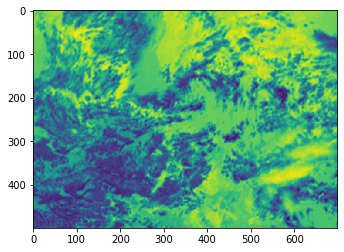

In [13]:
plt.imshow(b07k);

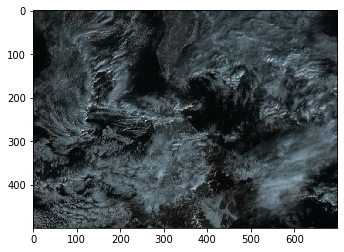

In [8]:
r = b03k
g = b02k
b = b01k
r = normalization(r)
g = normalization(g)
b = normalization(b)
rgb = np.dstack((r, g, b))
rgb = np.power(rgb, 1.0)
plt.imshow(rgb);

In [19]:
cv2.imwrite("b02.png",b02)

True

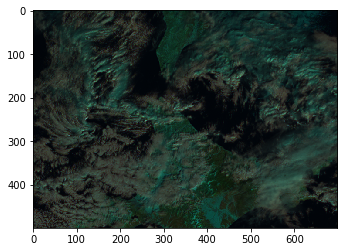

In [15]:
r = b05k
g = b04k
b = b03k

r = np.where(r < 0, 0, r)
g = np.where(g < 0, 0, g)
b = np.where(b < 0, 0, b)

rgb = np.dstack((r, g, b))
plt.imshow(rgb);

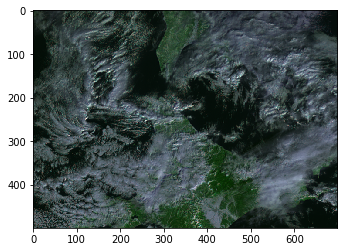

In [17]:
r = b03k
g = b04k
b = b01k
r = normalization(r)
g = normalization(g)
b = normalization(b)
rgb = np.dstack((r, g, b))
rgb = np.power(rgb, 1.0)
plt.imshow(rgb);

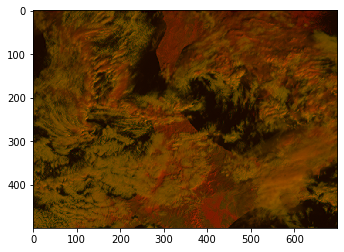

In [16]:
r = b04k
g = b05k
b = b07k

r = np.where(r < 0, 0, r)
g = np.where(g < 0, 0, g)
b = np.where(b < 0, 0, b)

gamma = 1.7
for i in range(700):
    for j in range(500):
         r[j][i] = 1 * pow(float(r[j][i]) / 1, 1.0 / gamma)
for i in range(700):
    for j in range(500):
         g[j][i] = 1 * pow(float(g[j][i]) / 1, 1.0 / gamma)
for i in range(700):
    for j in range(500):
         b[j][i] = 1 * pow(float(b[j][i]) / 1, 1.0 / gamma)
            
            
r = r * 1.0
g = g * 0.7
b = b * 0.3

rgb = np.dstack((r, g, b))
plt.imshow(rgb);

In [15]:
b01.shape

(500, 700)

In [86]:
plt.imsave('202001130100sf.png',rgb);

In [92]:
cv2.imwrite("testkaihyoucv2.png",rgb)

True

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import cv2
import numpy
import os
from scipy.interpolate import RectBivariateSpline
#最小値0、最大値1にする数量正規化メソッド
def normalization(x):
    x_min = x.min()
    x_max = x.max()
    x_norm = (x - x_min) / (x_max - x_min)
    return x_norm   #正規化した配列を返す

In [16]:
fnam = '201602160300/HS_H08_20160216_0300_B01_JP01_R10_S0101.DAT'

fsiz = os.path.getsize(fnam)
with open(fnam,'rb') as fp:
 head = fp.read(fsiz)
 data = np.frombuffer(fp.read(),dtype='u2')

imax, = np.frombuffer(head[3:5],dtype='u2')
j,h = 0,[]
for i in range(imax):
 n, = np.frombuffer(head[j+1:j+3],dtype='u2')
 h.append(head[j:j+n])
 j += n

colum, = np.frombuffer(h[1][5:7],dtype='u2')
line, = np.frombuffer(h[1][7:9],dtype='u2')



NCOL = int(colum)
NLIN = int(line)
hsiz = os.path.getsize(fnam)- NLIN*NCOL*2
with open(fnam,'rb') as fp:
 head = fp.read(hsiz)
 data = np.frombuffer(fp.read(),dtype='u2').reshape(NLIN,NCOL)
    
validbit, = np.frombuffer(h[4][13:15],dtype='u2')
sub_lon, = np.frombuffer(h[2][3:11])
cfac,lfac = np.frombuffer(h[2][11:19],dtype='u4')
coff,loff = np.frombuffer(h[2][19:27],dtype='f4')
p1,p2,p3,p4,p5,p6,p7 = np.frombuffer(h[2][27:83])
band, = np.frombuffer(h[4][3:5],dtype='u2')
wlen, = np.frombuffer(h[4][5:13])
verr,vout = np.frombuffer(h[4][15:19],dtype='u2')
gain,cnst = np.frombuffer(h[4][19:35])
lnum, = np.frombuffer(h[6][5:7],dtype='u2')

LMIN = 1.0e-60
lrad = gain*data+cnst
lrad[lrad < LMIN] = LMIN
if band > 7:
 wlen *= 1.0e-6
 lrad *= 1.0e6
 c0,c1,c2,c_0,c_1,c_2,c_c,c_h,c_k = np.frombuffer(h[4][35:107])
 t_e = c_h*c_c/(c_k*wlen*np.log(2*c_h*c_c**2/(wlen**5*lrad)+1))
 val = c0+c1*t_e+c2*t_e**2
else:
 coef, = np.frombuffer(h[4][35:43])
 val = coef*lrad
    
lon = np.arange(139.0,146.0,0.01)
lat = np.arange(47.5,42.5,-0.01)
col = np.arange(NCOL)+1
lin = np.arange(NLIN)+lnum
rad_lat = np.radians(lat)
c_lat = np.arctan(p5*np.tan(rad_lat))
c_lon = np.radians(lon-sub_lon)
cos_lat = np.cos(c_lat).reshape(-1,1)
sin_lat = np.sin(c_lat).reshape(-1,1)
cos_lon = np.cos(c_lon).reshape(1,-1)
sin_lon = np.sin(c_lon).reshape(1,-1)
rl = p3/np.sqrt(1.0-p4*cos_lat**2)
r1 = p1-rl*cos_lat*cos_lon
r2 = -rl*cos_lat*sin_lon
r3 = rl*sin_lat
rn = np.sqrt(r1*r1+r2*r2+r3*r3)
x = np.degrees(np.arctan(-r2/r1))
y = np.degrees(np.arcsin(-r3/rn))
col_out = coff+x/65536*cfac
lin_out = loff+y/65536*lfac
b01k = RectBivariateSpline(lin,col,val).ev(lin_out,col_out)
b01 = RectBivariateSpline(lin,col,data).ev(lin_out,col_out)

In [15]:
fnam = '201602160300/HS_H08_20160216_0300_B02_JP01_R10_S0101.DAT'

fsiz = os.path.getsize(fnam)
with open(fnam,'rb') as fp:
 head = fp.read(fsiz)
 data = np.frombuffer(fp.read(),dtype='u2')

imax, = np.frombuffer(head[3:5],dtype='u2')
j,h = 0,[]
for i in range(imax):
 n, = np.frombuffer(head[j+1:j+3],dtype='u2')
 h.append(head[j:j+n])
 j += n

colum, = np.frombuffer(h[1][5:7],dtype='u2')
line, = np.frombuffer(h[1][7:9],dtype='u2')



NCOL = int(colum)
NLIN = int(line)
hsiz = os.path.getsize(fnam)- NLIN*NCOL*2
with open(fnam,'rb') as fp:
 head = fp.read(hsiz)
 data = np.frombuffer(fp.read(),dtype='u2').reshape(NLIN,NCOL)
    
validbit, = np.frombuffer(h[4][13:15],dtype='u2')
sub_lon, = np.frombuffer(h[2][3:11])
cfac,lfac = np.frombuffer(h[2][11:19],dtype='u4')
coff,loff = np.frombuffer(h[2][19:27],dtype='f4')
p1,p2,p3,p4,p5,p6,p7 = np.frombuffer(h[2][27:83])
band, = np.frombuffer(h[4][3:5],dtype='u2')
wlen, = np.frombuffer(h[4][5:13])
verr,vout = np.frombuffer(h[4][15:19],dtype='u2')
gain,cnst = np.frombuffer(h[4][19:35])
lnum, = np.frombuffer(h[6][5:7],dtype='u2')

LMIN = 1.0e-60
lrad = gain*data+cnst
lrad[lrad < LMIN] = LMIN
if band > 7:
 wlen *= 1.0e-6
 lrad *= 1.0e6
 c0,c1,c2,c_0,c_1,c_2,c_c,c_h,c_k = np.frombuffer(h[4][35:107])
 t_e = c_h*c_c/(c_k*wlen*np.log(2*c_h*c_c**2/(wlen**5*lrad)+1))
 val = c0+c1*t_e+c2*t_e**2
else:
 coef, = np.frombuffer(h[4][35:43])
 val = coef*lrad
    
lon = np.arange(139.0,146.0,0.01)
lat = np.arange(47.5,42.5,-0.01)
col = np.arange(NCOL)+1
lin = np.arange(NLIN)+lnum
rad_lat = np.radians(lat)
c_lat = np.arctan(p5*np.tan(rad_lat))
c_lon = np.radians(lon-sub_lon)
cos_lat = np.cos(c_lat).reshape(-1,1)
sin_lat = np.sin(c_lat).reshape(-1,1)
cos_lon = np.cos(c_lon).reshape(1,-1)
sin_lon = np.sin(c_lon).reshape(1,-1)
rl = p3/np.sqrt(1.0-p4*cos_lat**2)
r1 = p1-rl*cos_lat*cos_lon
r2 = -rl*cos_lat*sin_lon
r3 = rl*sin_lat
rn = np.sqrt(r1*r1+r2*r2+r3*r3)
x = np.degrees(np.arctan(-r2/r1))
y = np.degrees(np.arcsin(-r3/rn))
col_out = coff+x/65536*cfac
lin_out = loff+y/65536*lfac
b02k = RectBivariateSpline(lin,col,val).ev(lin_out,col_out)
b02 = RectBivariateSpline(lin,col,data).ev(lin_out,col_out)

In [14]:
fnam = '201602160300/HS_H08_20160216_0300_B03_JP01_R05_S0101.DAT'

fsiz = os.path.getsize(fnam)
with open(fnam,'rb') as fp:
 head = fp.read(fsiz)
 data = np.frombuffer(fp.read(),dtype='u2')

imax, = np.frombuffer(head[3:5],dtype='u2')
j,h = 0,[]
for i in range(imax):
 n, = np.frombuffer(head[j+1:j+3],dtype='u2')
 h.append(head[j:j+n])
 j += n

colum, = np.frombuffer(h[1][5:7],dtype='u2')
line, = np.frombuffer(h[1][7:9],dtype='u2')



NCOL = int(colum)
NLIN = int(line)
hsiz = os.path.getsize(fnam)- NLIN*NCOL*2
with open(fnam,'rb') as fp:
 head = fp.read(hsiz)
 data = np.frombuffer(fp.read(),dtype='u2').reshape(NLIN,NCOL)
    
validbit, = np.frombuffer(h[4][13:15],dtype='u2')
sub_lon, = np.frombuffer(h[2][3:11])
cfac,lfac = np.frombuffer(h[2][11:19],dtype='u4')
coff,loff = np.frombuffer(h[2][19:27],dtype='f4')
p1,p2,p3,p4,p5,p6,p7 = np.frombuffer(h[2][27:83])
band, = np.frombuffer(h[4][3:5],dtype='u2')
wlen, = np.frombuffer(h[4][5:13])
verr,vout = np.frombuffer(h[4][15:19],dtype='u2')
gain,cnst = np.frombuffer(h[4][19:35])
lnum, = np.frombuffer(h[6][5:7],dtype='u2')

LMIN = 1.0e-60
lrad = gain*data+cnst
lrad[lrad < LMIN] = LMIN
if band > 7:
 wlen *= 1.0e-6
 lrad *= 1.0e6
 c0,c1,c2,c_0,c_1,c_2,c_c,c_h,c_k = np.frombuffer(h[4][35:107])
 t_e = c_h*c_c/(c_k*wlen*np.log(2*c_h*c_c**2/(wlen**5*lrad)+1))
 val = c0+c1*t_e+c2*t_e**2
else:
 coef, = np.frombuffer(h[4][35:43])
 val = coef*lrad
    
lon = np.arange(139.0,146.0,0.01)
lat = np.arange(47.5,42.5,-0.01)
col = np.arange(NCOL)+1
lin = np.arange(NLIN)+lnum
rad_lat = np.radians(lat)
c_lat = np.arctan(p5*np.tan(rad_lat))
c_lon = np.radians(lon-sub_lon)
cos_lat = np.cos(c_lat).reshape(-1,1)
sin_lat = np.sin(c_lat).reshape(-1,1)
cos_lon = np.cos(c_lon).reshape(1,-1)
sin_lon = np.sin(c_lon).reshape(1,-1)
rl = p3/np.sqrt(1.0-p4*cos_lat**2)
r1 = p1-rl*cos_lat*cos_lon
r2 = -rl*cos_lat*sin_lon
r3 = rl*sin_lat
rn = np.sqrt(r1*r1+r2*r2+r3*r3)
x = np.degrees(np.arctan(-r2/r1))
y = np.degrees(np.arcsin(-r3/rn))
col_out = coff+x/65536*cfac
lin_out = loff+y/65536*lfac
b03k = RectBivariateSpline(lin,col,val).ev(lin_out,col_out)
b03 = RectBivariateSpline(lin,col,data).ev(lin_out,col_out)

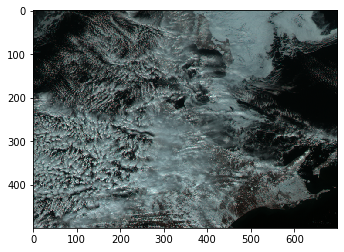

In [25]:
r = b03k
g = b02k
b = b01k
r = normalization(r)
g = normalization(g)
b = normalization(b)
rgb = np.dstack((r, g, b))
rgb = np.power(rgb, 1.0)
plt.imshow(rgb);

In [26]:
plt.imsave('201602160300tc.png',rgb);

In [4]:
fnam = '201602160300/HS_H08_20160216_0300_B04_JP01_R10_S0101.DAT'

fsiz = os.path.getsize(fnam)
with open(fnam,'rb') as fp:
 head = fp.read(fsiz)
 data = np.frombuffer(fp.read(),dtype='u2')

imax, = np.frombuffer(head[3:5],dtype='u2')
j,h = 0,[]
for i in range(imax):
 n, = np.frombuffer(head[j+1:j+3],dtype='u2')
 h.append(head[j:j+n])
 j += n

colum, = np.frombuffer(h[1][5:7],dtype='u2')
line, = np.frombuffer(h[1][7:9],dtype='u2')



NCOL = int(colum)
NLIN = int(line)
hsiz = os.path.getsize(fnam)- NLIN*NCOL*2
with open(fnam,'rb') as fp:
 head = fp.read(hsiz)
 data = np.frombuffer(fp.read(),dtype='u2').reshape(NLIN,NCOL)
    
validbit, = np.frombuffer(h[4][13:15],dtype='u2')
sub_lon, = np.frombuffer(h[2][3:11])
cfac,lfac = np.frombuffer(h[2][11:19],dtype='u4')
coff,loff = np.frombuffer(h[2][19:27],dtype='f4')
p1,p2,p3,p4,p5,p6,p7 = np.frombuffer(h[2][27:83])
band, = np.frombuffer(h[4][3:5],dtype='u2')
wlen, = np.frombuffer(h[4][5:13])
verr,vout = np.frombuffer(h[4][15:19],dtype='u2')
gain,cnst = np.frombuffer(h[4][19:35])
lnum, = np.frombuffer(h[6][5:7],dtype='u2')

LMIN = 1.0e-60
lrad = gain*data+cnst
lrad[lrad < LMIN] = LMIN
if band > 7:
 wlen *= 1.0e-6
 lrad *= 1.0e6
 c0,c1,c2,c_0,c_1,c_2,c_c,c_h,c_k = np.frombuffer(h[4][35:107])
 t_e = c_h*c_c/(c_k*wlen*np.log(2*c_h*c_c**2/(wlen**5*lrad)+1))
 val = c0+c1*t_e+c2*t_e**2
else:
 coef, = np.frombuffer(h[4][35:43])
 val = coef*lrad
    
lon = np.arange(139.0,146.0,0.01)
lat = np.arange(47.5,42.5,-0.01)
col = np.arange(NCOL)+1
lin = np.arange(NLIN)+lnum
rad_lat = np.radians(lat)
c_lat = np.arctan(p5*np.tan(rad_lat))
c_lon = np.radians(lon-sub_lon)
cos_lat = np.cos(c_lat).reshape(-1,1)
sin_lat = np.sin(c_lat).reshape(-1,1)
cos_lon = np.cos(c_lon).reshape(1,-1)
sin_lon = np.sin(c_lon).reshape(1,-1)
rl = p3/np.sqrt(1.0-p4*cos_lat**2)
r1 = p1-rl*cos_lat*cos_lon
r2 = -rl*cos_lat*sin_lon
r3 = rl*sin_lat
rn = np.sqrt(r1*r1+r2*r2+r3*r3)
x = np.degrees(np.arctan(-r2/r1))
y = np.degrees(np.arcsin(-r3/rn))
col_out = coff+x/65536*cfac
lin_out = loff+y/65536*lfac
b04k = RectBivariateSpline(lin,col,val).ev(lin_out,col_out)
b04 = RectBivariateSpline(lin,col,data).ev(lin_out,col_out)

In [7]:
fnam = '201602160300/HS_H08_20160216_0300_B05_JP01_R20_S0101.DAT'

fsiz = os.path.getsize(fnam)
with open(fnam,'rb') as fp:
 head = fp.read(fsiz)
 data = np.frombuffer(fp.read(),dtype='u2')

imax, = np.frombuffer(head[3:5],dtype='u2')
j,h = 0,[]
for i in range(imax):
 n, = np.frombuffer(head[j+1:j+3],dtype='u2')
 h.append(head[j:j+n])
 j += n

colum, = np.frombuffer(h[1][5:7],dtype='u2')
line, = np.frombuffer(h[1][7:9],dtype='u2')



NCOL = int(colum)
NLIN = int(line)
hsiz = os.path.getsize(fnam)- NLIN*NCOL*2
with open(fnam,'rb') as fp:
 head = fp.read(hsiz)
 data = np.frombuffer(fp.read(),dtype='u2').reshape(NLIN,NCOL)
    
validbit, = np.frombuffer(h[4][13:15],dtype='u2')
sub_lon, = np.frombuffer(h[2][3:11])
cfac,lfac = np.frombuffer(h[2][11:19],dtype='u4')
coff,loff = np.frombuffer(h[2][19:27],dtype='f4')
p1,p2,p3,p4,p5,p6,p7 = np.frombuffer(h[2][27:83])
band, = np.frombuffer(h[4][3:5],dtype='u2')
wlen, = np.frombuffer(h[4][5:13])
verr,vout = np.frombuffer(h[4][15:19],dtype='u2')
gain,cnst = np.frombuffer(h[4][19:35])
lnum, = np.frombuffer(h[6][5:7],dtype='u2')

LMIN = 1.0e-60
lrad = gain*data+cnst
lrad[lrad < LMIN] = LMIN
if band > 7:
 wlen *= 1.0e-6
 lrad *= 1.0e6
 c0,c1,c2,c_0,c_1,c_2,c_c,c_h,c_k = np.frombuffer(h[4][35:107])
 t_e = c_h*c_c/(c_k*wlen*np.log(2*c_h*c_c**2/(wlen**5*lrad)+1))
 val = c0+c1*t_e+c2*t_e**2
else:
 coef, = np.frombuffer(h[4][35:43])
 val = coef*lrad
    
lon = np.arange(139.0,146.0,0.01)
lat = np.arange(47.5,42.5,-0.01)
col = np.arange(NCOL)+1
lin = np.arange(NLIN)+lnum
rad_lat = np.radians(lat)
c_lat = np.arctan(p5*np.tan(rad_lat))
c_lon = np.radians(lon-sub_lon)
cos_lat = np.cos(c_lat).reshape(-1,1)
sin_lat = np.sin(c_lat).reshape(-1,1)
cos_lon = np.cos(c_lon).reshape(1,-1)
sin_lon = np.sin(c_lon).reshape(1,-1)
rl = p3/np.sqrt(1.0-p4*cos_lat**2)
r1 = p1-rl*cos_lat*cos_lon
r2 = -rl*cos_lat*sin_lon
r3 = rl*sin_lat
rn = np.sqrt(r1*r1+r2*r2+r3*r3)
x = np.degrees(np.arctan(-r2/r1))
y = np.degrees(np.arcsin(-r3/rn))
col_out = coff+x/65536*cfac
lin_out = loff+y/65536*lfac
b05k = RectBivariateSpline(lin,col,val).ev(lin_out,col_out)
b05 = RectBivariateSpline(lin,col,data).ev(lin_out,col_out)

In [8]:
fnam = '201602160300/HS_H08_20160216_0300_B07_JP01_R20_S0101.DAT'

fsiz = os.path.getsize(fnam)
with open(fnam,'rb') as fp:
 head = fp.read(fsiz)
 data = np.frombuffer(fp.read(),dtype='u2')

imax, = np.frombuffer(head[3:5],dtype='u2')
j,h = 0,[]
for i in range(imax):
 n, = np.frombuffer(head[j+1:j+3],dtype='u2')
 h.append(head[j:j+n])
 j += n

colum, = np.frombuffer(h[1][5:7],dtype='u2')
line, = np.frombuffer(h[1][7:9],dtype='u2')



NCOL = int(colum)
NLIN = int(line)
hsiz = os.path.getsize(fnam)- NLIN*NCOL*2
with open(fnam,'rb') as fp:
 head = fp.read(hsiz)
 data = np.frombuffer(fp.read(),dtype='u2').reshape(NLIN,NCOL)
    
validbit, = np.frombuffer(h[4][13:15],dtype='u2')
sub_lon, = np.frombuffer(h[2][3:11])
cfac,lfac = np.frombuffer(h[2][11:19],dtype='u4')
coff,loff = np.frombuffer(h[2][19:27],dtype='f4')
p1,p2,p3,p4,p5,p6,p7 = np.frombuffer(h[2][27:83])
band, = np.frombuffer(h[4][3:5],dtype='u2')
wlen, = np.frombuffer(h[4][5:13])
verr,vout = np.frombuffer(h[4][15:19],dtype='u2')
gain,cnst = np.frombuffer(h[4][19:35])
lnum, = np.frombuffer(h[6][5:7],dtype='u2')

LMIN = 1.0e-60
lrad = gain*data+cnst
lrad[lrad < LMIN] = LMIN
if band > 7:
 wlen *= 1.0e-6
 lrad *= 1.0e6
 c0,c1,c2,c_0,c_1,c_2,c_c,c_h,c_k = np.frombuffer(h[4][35:107])
 t_e = c_h*c_c/(c_k*wlen*np.log(2*c_h*c_c**2/(wlen**5*lrad)+1))
 val = c0+c1*t_e+c2*t_e**2
else:
 coef, = np.frombuffer(h[4][35:43])
 val = coef*lrad
    
lon = np.arange(139.0,146.0,0.01)
lat = np.arange(47.5,42.5,-0.01)
col = np.arange(NCOL)+1
lin = np.arange(NLIN)+lnum
rad_lat = np.radians(lat)
c_lat = np.arctan(p5*np.tan(rad_lat))
c_lon = np.radians(lon-sub_lon)
cos_lat = np.cos(c_lat).reshape(-1,1)
sin_lat = np.sin(c_lat).reshape(-1,1)
cos_lon = np.cos(c_lon).reshape(1,-1)
sin_lon = np.sin(c_lon).reshape(1,-1)
rl = p3/np.sqrt(1.0-p4*cos_lat**2)
r1 = p1-rl*cos_lat*cos_lon
r2 = -rl*cos_lat*sin_lon
r3 = rl*sin_lat
rn = np.sqrt(r1*r1+r2*r2+r3*r3)
x = np.degrees(np.arctan(-r2/r1))
y = np.degrees(np.arcsin(-r3/rn))
col_out = coff+x/65536*cfac
lin_out = loff+y/65536*lfac
b07k = RectBivariateSpline(lin,col,val).ev(lin_out,col_out)
b07 = RectBivariateSpline(lin,col,data).ev(lin_out,col_out)

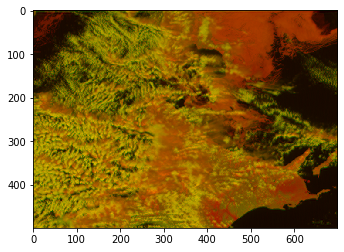

In [9]:
r = b04k
g = b05k
b = b07k
r = np.where(r < 0, 0, r)
g = np.where(g < 0, 0, g)
b = np.where(b < 0, 0, b)
r = np.where(r > 1.0, 0, r)
g = np.where(g > 0.7, 0, g)
b = np.where(b > 0.3, 0, b)
gamma = 1.7
for i in range(700):
    for j in range(500):
         r[j][i] = 1 * pow(float(r[j][i]) / 1, 1.0 / gamma)
for i in range(700):
    for j in range(500):
         g[j][i] = 1 * pow(float(g[j][i]) / 1, 1.0 / gamma)
for i in range(700):
    for j in range(500):
         b[j][i] = 1 * pow(float(b[j][i]) / 1, 1.0 / gamma)
rgb = np.dstack((r, g, b))
plt.imshow(rgb,extent=(lon[0],lon[-1],lat[-1],lat[0]),interpolation='none')
plt.colorbar();
plt.imsave('201602160300sf.png',rgb);

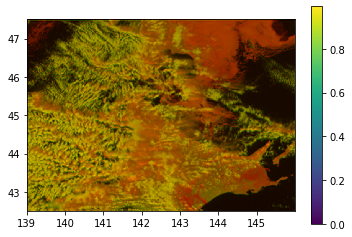

In [10]:
plt.imshow(rgb,extent=(lon[0],lon[-1],lat[-1],lat[0]),interpolation='none')
plt.colorbar();

In [11]:
plt.imsave('201602160300sf.png',rgb);

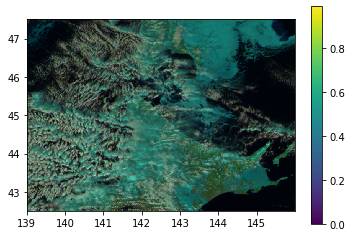

In [18]:
r = b05k
g = b04k
b = b03k
r = np.where(r < 0, 0, r)
g = np.where(g < 0, 0, g)
b = np.where(b < 0, 0, b)
r = np.where(r > 1, 1, r)
g = np.where(g > 1, 1, g)
b = np.where(b > 1, 1, b)
rgb = np.dstack((r, g, b))
plt.imshow(rgb,extent=(lon[0],lon[-1],lat[-1],lat[0]),interpolation='none')
plt.colorbar();
plt.imsave('201602160300nc.png',rgb);

In [19]:
plt.imsave('201602160300nc.png',rgb);

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import cv2
import numpy
import os
from scipy.interpolate import RectBivariateSpline
#最小値0、最大値1にする数量正規化メソッド
def normalization(x):
    x_min = x.min()
    x_max = x.max()
    x_norm = (x - x_min) / (x_max - x_min)
    return x_norm   #正規化した配列を返す

fnam = '201603270300/DAT/HS_H08_20160327_0300_B03_JP01_R05_S0101.DAT'
fsiz = os.path.getsize(fnam)
with open(fnam,'rb') as fp:
 head = fp.read(fsiz)
 data = np.frombuffer(fp.read(),dtype='u2')
imax, = np.frombuffer(head[3:5],dtype='u2')
j,h = 0,[]
for i in range(imax):
 n, = np.frombuffer(head[j+1:j+3],dtype='u2')
 h.append(head[j:j+n])
 j += n
colum, = np.frombuffer(h[1][5:7],dtype='u2')
line, = np.frombuffer(h[1][7:9],dtype='u2')
NCOL = int(colum)
NLIN = int(line)
hsiz = os.path.getsize(fnam)- NLIN*NCOL*2
with open(fnam,'rb') as fp:
 head = fp.read(hsiz)
 data = np.frombuffer(fp.read(),dtype='u2').reshape(NLIN,NCOL)   
validbit, = np.frombuffer(h[4][13:15],dtype='u2')
sub_lon, = np.frombuffer(h[2][3:11])
cfac,lfac = np.frombuffer(h[2][11:19],dtype='u4')
coff,loff = np.frombuffer(h[2][19:27],dtype='f4')
p1,p2,p3,p4,p5,p6,p7 = np.frombuffer(h[2][27:83])
band, = np.frombuffer(h[4][3:5],dtype='u2')
wlen, = np.frombuffer(h[4][5:13])
verr,vout = np.frombuffer(h[4][15:19],dtype='u2')
gain,cnst = np.frombuffer(h[4][19:35])
lnum, = np.frombuffer(h[6][5:7],dtype='u2')
LMIN = 1.0e-60
lrad = gain*data+cnst
lrad[lrad < LMIN] = LMIN
if band > 6:
 wlen *= 1.0e-6
 lrad *= 1.0e6
 c0,c1,c2,c_0,c_1,c_2,c_c,c_h,c_k = np.frombuffer(h[4][35:107])
 t_e = c_h*c_c/(c_k*wlen*np.log(2*c_h*c_c**2/(wlen**5*lrad)+1))
 val = c0+c1*t_e+c2*t_e**2
else:
 coef, = np.frombuffer(h[4][35:43])
 val = coef*lrad    
lon = np.arange(141.0,147.0,0.01)
lat = np.arange(47.0,42.0,-0.01)
col = np.arange(NCOL)+1
lin = np.arange(NLIN)+lnum
rad_lat = np.radians(lat)
c_lat = np.arctan(p5*np.tan(rad_lat))
c_lon = np.radians(lon-sub_lon)
cos_lat = np.cos(c_lat).reshape(-1,1)
sin_lat = np.sin(c_lat).reshape(-1,1)
cos_lon = np.cos(c_lon).reshape(1,-1)
sin_lon = np.sin(c_lon).reshape(1,-1)
rl = p3/np.sqrt(1.0-p4*cos_lat**2)
r1 = p1-rl*cos_lat*cos_lon
r2 = -rl*cos_lat*sin_lon
r3 = rl*sin_lat
rn = np.sqrt(r1*r1+r2*r2+r3*r3)
x = np.degrees(np.arctan(-r2/r1))
y = np.degrees(np.arcsin(-r3/rn))
col_out = coff+x/65536*cfac
lin_out = loff+y/65536*lfac
b03k = RectBivariateSpline(lin,col,val).ev(lin_out,col_out)
b03 = RectBivariateSpline(lin,col,data).ev(lin_out,col_out)

fnam = '201603270300/DAT/HS_H08_20160327_0300_B04_JP01_R10_S0101.DAT'
fsiz = os.path.getsize(fnam)
with open(fnam,'rb') as fp:
 head = fp.read(fsiz)
 data = np.frombuffer(fp.read(),dtype='u2')
imax, = np.frombuffer(head[3:5],dtype='u2')
j,h = 0,[]
for i in range(imax):
 n, = np.frombuffer(head[j+1:j+3],dtype='u2')
 h.append(head[j:j+n])
 j += n
colum, = np.frombuffer(h[1][5:7],dtype='u2')
line, = np.frombuffer(h[1][7:9],dtype='u2')
NCOL = int(colum)
NLIN = int(line)
hsiz = os.path.getsize(fnam)- NLIN*NCOL*2
with open(fnam,'rb') as fp:
 head = fp.read(hsiz)
 data = np.frombuffer(fp.read(),dtype='u2').reshape(NLIN,NCOL)   
validbit, = np.frombuffer(h[4][13:15],dtype='u2')
sub_lon, = np.frombuffer(h[2][3:11])
cfac,lfac = np.frombuffer(h[2][11:19],dtype='u4')
coff,loff = np.frombuffer(h[2][19:27],dtype='f4')
p1,p2,p3,p4,p5,p6,p7 = np.frombuffer(h[2][27:83])
band, = np.frombuffer(h[4][3:5],dtype='u2')
wlen, = np.frombuffer(h[4][5:13])
verr,vout = np.frombuffer(h[4][15:19],dtype='u2')
gain,cnst = np.frombuffer(h[4][19:35])
lnum, = np.frombuffer(h[6][5:7],dtype='u2')
LMIN = 1.0e-60
lrad = gain*data+cnst
lrad[lrad < LMIN] = LMIN
if band > 6:
 wlen *= 1.0e-6
 lrad *= 1.0e6
 c0,c1,c2,c_0,c_1,c_2,c_c,c_h,c_k = np.frombuffer(h[4][35:107])
 t_e = c_h*c_c/(c_k*wlen*np.log(2*c_h*c_c**2/(wlen**5*lrad)+1))
 val = c0+c1*t_e+c2*t_e**2
else:
 coef, = np.frombuffer(h[4][35:43])
 val = coef*lrad    
lon = np.arange(141.0,147.0,0.01)
lat = np.arange(47.0,42.0,-0.01)
col = np.arange(NCOL)+1
lin = np.arange(NLIN)+lnum
rad_lat = np.radians(lat)
c_lat = np.arctan(p5*np.tan(rad_lat))
c_lon = np.radians(lon-sub_lon)
cos_lat = np.cos(c_lat).reshape(-1,1)
sin_lat = np.sin(c_lat).reshape(-1,1)
cos_lon = np.cos(c_lon).reshape(1,-1)
sin_lon = np.sin(c_lon).reshape(1,-1)
rl = p3/np.sqrt(1.0-p4*cos_lat**2)
r1 = p1-rl*cos_lat*cos_lon
r2 = -rl*cos_lat*sin_lon
r3 = rl*sin_lat
rn = np.sqrt(r1*r1+r2*r2+r3*r3)
x = np.degrees(np.arctan(-r2/r1))
y = np.degrees(np.arcsin(-r3/rn))
col_out = coff+x/65536*cfac
lin_out = loff+y/65536*lfac
b04k = RectBivariateSpline(lin,col,val).ev(lin_out,col_out)
b04 = RectBivariateSpline(lin,col,data).ev(lin_out,col_out)

fnam = '201603270300/DAT/HS_H08_20160327_0300_B05_JP01_R20_S0101.DAT'
fsiz = os.path.getsize(fnam)
with open(fnam,'rb') as fp:
 head = fp.read(fsiz)
 data = np.frombuffer(fp.read(),dtype='u2')
imax, = np.frombuffer(head[3:5],dtype='u2')
j,h = 0,[]
for i in range(imax):
 n, = np.frombuffer(head[j+1:j+3],dtype='u2')
 h.append(head[j:j+n])
 j += n
colum, = np.frombuffer(h[1][5:7],dtype='u2')
line, = np.frombuffer(h[1][7:9],dtype='u2')
NCOL = int(colum)
NLIN = int(line)
hsiz = os.path.getsize(fnam)- NLIN*NCOL*2
with open(fnam,'rb') as fp:
 head = fp.read(hsiz)
 data = np.frombuffer(fp.read(),dtype='u2').reshape(NLIN,NCOL)   
validbit, = np.frombuffer(h[4][13:15],dtype='u2')
sub_lon, = np.frombuffer(h[2][3:11])
cfac,lfac = np.frombuffer(h[2][11:19],dtype='u4')
coff,loff = np.frombuffer(h[2][19:27],dtype='f4')
p1,p2,p3,p4,p5,p6,p7 = np.frombuffer(h[2][27:83])
band, = np.frombuffer(h[4][3:5],dtype='u2')
wlen, = np.frombuffer(h[4][5:13])
verr,vout = np.frombuffer(h[4][15:19],dtype='u2')
gain,cnst = np.frombuffer(h[4][19:35])
lnum, = np.frombuffer(h[6][5:7],dtype='u2')
LMIN = 1.0e-60
lrad = gain*data+cnst
lrad[lrad < LMIN] = LMIN
if band > 6:
 wlen *= 1.0e-6
 lrad *= 1.0e6
 c0,c1,c2,c_0,c_1,c_2,c_c,c_h,c_k = np.frombuffer(h[4][35:107])
 t_e = c_h*c_c/(c_k*wlen*np.log(2*c_h*c_c**2/(wlen**5*lrad)+1))
 val = c0+c1*t_e+c2*t_e**2
else:
 coef, = np.frombuffer(h[4][35:43])
 val = coef*lrad    
lon = np.arange(141.0,147.0,0.01)
lat = np.arange(47.0,42.0,-0.01)
col = np.arange(NCOL)+1
lin = np.arange(NLIN)+lnum
rad_lat = np.radians(lat)
c_lat = np.arctan(p5*np.tan(rad_lat))
c_lon = np.radians(lon-sub_lon)
cos_lat = np.cos(c_lat).reshape(-1,1)
sin_lat = np.sin(c_lat).reshape(-1,1)
cos_lon = np.cos(c_lon).reshape(1,-1)
sin_lon = np.sin(c_lon).reshape(1,-1)
rl = p3/np.sqrt(1.0-p4*cos_lat**2)
r1 = p1-rl*cos_lat*cos_lon
r2 = -rl*cos_lat*sin_lon
r3 = rl*sin_lat
rn = np.sqrt(r1*r1+r2*r2+r3*r3)
x = np.degrees(np.arctan(-r2/r1))
y = np.degrees(np.arcsin(-r3/rn))
col_out = coff+x/65536*cfac
lin_out = loff+y/65536*lfac
b05k = RectBivariateSpline(lin,col,val).ev(lin_out,col_out)
b05 = RectBivariateSpline(lin,col,data).ev(lin_out,col_out)

fnam = '201603270300/DAT/HS_H08_20160327_0300_B07_JP01_R20_S0101.DAT'
fsiz = os.path.getsize(fnam)
with open(fnam,'rb') as fp:
 head = fp.read(fsiz)
 data = np.frombuffer(fp.read(),dtype='u2')
imax, = np.frombuffer(head[3:5],dtype='u2')
j,h = 0,[]
for i in range(imax):
 n, = np.frombuffer(head[j+1:j+3],dtype='u2')
 h.append(head[j:j+n])
 j += n
colum, = np.frombuffer(h[1][5:7],dtype='u2')
line, = np.frombuffer(h[1][7:9],dtype='u2')
NCOL = int(colum)
NLIN = int(line)
hsiz = os.path.getsize(fnam)- NLIN*NCOL*2
with open(fnam,'rb') as fp:
 head = fp.read(hsiz)
 data = np.frombuffer(fp.read(),dtype='u2').reshape(NLIN,NCOL)   
validbit, = np.frombuffer(h[4][13:15],dtype='u2')
sub_lon, = np.frombuffer(h[2][3:11])
cfac,lfac = np.frombuffer(h[2][11:19],dtype='u4')
coff,loff = np.frombuffer(h[2][19:27],dtype='f4')
p1,p2,p3,p4,p5,p6,p7 = np.frombuffer(h[2][27:83])
band, = np.frombuffer(h[4][3:5],dtype='u2')
wlen, = np.frombuffer(h[4][5:13])
verr,vout = np.frombuffer(h[4][15:19],dtype='u2')
gain,cnst = np.frombuffer(h[4][19:35])
lnum, = np.frombuffer(h[6][5:7],dtype='u2')
LMIN = 1.0e-60
lrad = gain*data+cnst
lrad[lrad < LMIN] = LMIN
if band > 7:
 wlen *= 1.0e-6
 lrad *= 1.0e6
 c0,c1,c2,c_0,c_1,c_2,c_c,c_h,c_k = np.frombuffer(h[4][35:107])
 t_e = c_h*c_c/(c_k*wlen*np.log(2*c_h*c_c**2/(wlen**5*lrad)+1))
 val = c0+c1*t_e+c2*t_e**2
else:
 coef, = np.frombuffer(h[4][35:43])
 val = coef*lrad    
lon = np.arange(141.0,147.0,0.01)
lat = np.arange(47.0,42.0,-0.01)
col = np.arange(NCOL)+1
lin = np.arange(NLIN)+lnum
rad_lat = np.radians(lat)
c_lat = np.arctan(p5*np.tan(rad_lat))
c_lon = np.radians(lon-sub_lon)
cos_lat = np.cos(c_lat).reshape(-1,1)
sin_lat = np.sin(c_lat).reshape(-1,1)
cos_lon = np.cos(c_lon).reshape(1,-1)
sin_lon = np.sin(c_lon).reshape(1,-1)
rl = p3/np.sqrt(1.0-p4*cos_lat**2)
r1 = p1-rl*cos_lat*cos_lon
r2 = -rl*cos_lat*sin_lon
r3 = rl*sin_lat
rn = np.sqrt(r1*r1+r2*r2+r3*r3)
x = np.degrees(np.arctan(-r2/r1))
y = np.degrees(np.arcsin(-r3/rn))
col_out = coff+x/65536*cfac
lin_out = loff+y/65536*lfac
b07k = RectBivariateSpline(lin,col,val).ev(lin_out,col_out)
b07 = RectBivariateSpline(lin,col,data).ev(lin_out,col_out)

r = b05k
g = b04k
b = b03k
r = np.where(r < 0, 0, r)
g = np.where(g < 0, 0, g)
b = np.where(b < 0, 0, b)
r = np.where(r > 1, 1, r)
g = np.where(g > 1, 1, g)
b = np.where(b > 1, 1, b)
nc = np.dstack((r, g, b))
plt.imsave('201603270300nc.png',nc);

r = b04k
g = b05k
b = b07k
r = np.where(r < 0, 0, r)
g = np.where(g < 0, 0, g)
b = np.where(b < 0, 0, b)
r = np.where(r > 1.0, 0, r)
g = np.where(g > 0.7, 0, g)
b = np.where(b > 0.3, 0, b)
gamma = 1.7
for i in range(600):
    for j in range(500):
         r[j][i] = 1 * pow(float(r[j][i]) / 1, 1.0 / gamma)
for i in range(600):
    for j in range(500):
         g[j][i] = 1 * pow(float(g[j][i]) / 1, 1.0 / gamma)
for i in range(600):
    for j in range(500):
         b[j][i] = 1 * pow(float(b[j][i]) / 1, 1.0 / gamma)
sf = np.dstack((r, g, b))
plt.imsave('201603270300sf.png',sf);